In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [22]:
df = pd.read_csv("C:\\Users\\Sarmistha\\Downloads\\archive\insurance.csv")
print(df)



      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [23]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [26]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

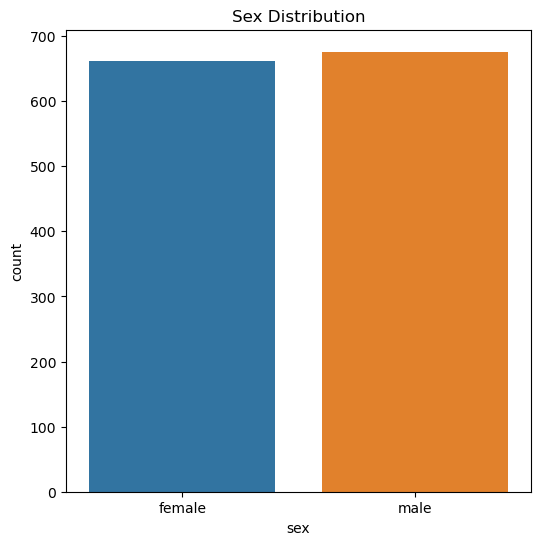

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

<Axes: >

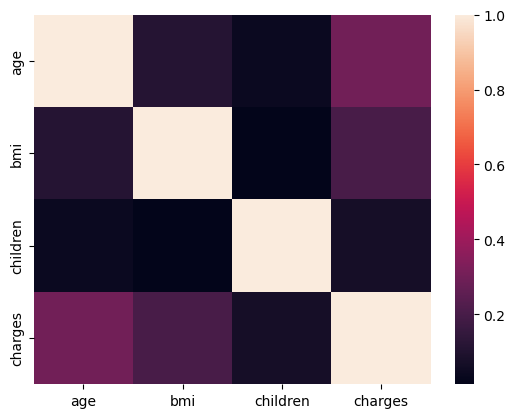

In [28]:
sns.heatmap(df.corr())

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

In [31]:
df.replace({'smoker':{'yes':1,'no':0}}, inplace=True)


In [32]:
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [33]:
x = df.drop(columns='charges', axis=1)
y = df['charges']


In [34]:

#Split the Data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7 , random_state=12)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((936, 6), (936,), (402, 6), (402,))

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm= LinearRegression()
lm

LinearRegression()

In [37]:
lm.fit(x_train,y_train)

LinearRegression()

In [38]:
print(lm.intercept_)

-13511.572151997068


In [39]:
print(lm.coef_)

[  258.77835722    64.65789597   357.70750903   306.65047888
 24051.79729072   242.78049809]


In [40]:

coeff_df = pd.DataFrame(lm.coef_,x_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,258.778357
sex,64.657896
bmi,357.707509
children,306.650479
smoker,24051.797291
region,242.780498


In [41]:
# Making predictions using the model
y_pred = lm.predict(x_test)
print(y_pred)

[ 9609.97030065  6105.1156339  30834.8111335   6157.49191606
  1915.17974097  2050.57060414  3085.48317102 17625.59475237
  9362.49152976 33046.09114011  9602.74251676 11112.20064381
  8961.37991621  2886.86836993  4137.38949376  3108.9381893
  7014.09681538 11941.87138162  3556.44963205 12149.45344123
  9814.24478259  4796.73944973 12695.9602329  11627.26138616
 28790.20384111   548.03050231 13851.40145157 13271.74548216
  7401.82616706 12940.08408765  8324.68994379  4988.24887283
 32653.63894436 35838.29818563  8733.61920163  5833.5971761
  7021.20770265  9329.55022746  7620.43638826 40582.23668034
  3018.86027978  5714.59721905 15015.56678099 32346.96312042
  3106.50651333  7945.21417692  9831.38820736 31806.96395249
 16862.2587437  10048.20219115 13317.05896283 34021.523384
  7829.81585638 33813.41517933 16349.88064916  2138.29047139
  4439.98717935 12265.88986512 12859.51364494 12180.50067101
 16036.19545178  7271.03362078 29545.376303   32077.6602697
  3075.83083072  5387.6622501

In [42]:
#Model Performance Metrics
#Coefficient of Determination (R square)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
r_squared



0.6963527940045462

In [43]:
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 40465123.51221674
Root_Mean_Squared_Error : 6361.220284836609
r_square_value : 0.6963527940045462


In [44]:
from sklearn.metrics import accuracy_score

In [45]:
training_data_pred = lm.predict(x_train)
r2_train = metrics.r2_score(y_train, training_data_pred)
print(f"R squared value: {r2_train}")

R squared value: 0.7697046826415501


In [46]:
test_data_prediction =lm.predict(x_test)
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.6963527940045462


In [47]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-13487.720022408466
[  258.73452842    58.70373287   357.66629488   306.92045455
 23975.55741707   241.58409334]
0.6964609991889587


In [48]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2)
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-13509.827206501053
[  258.77876719    63.73492373   357.68845525   306.50891271
 24050.50410045   242.58055733]
0.6963519348888575


In [49]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [51]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [53]:
y_pred3 = rf.predict(x_test)
y_pred4 = gbr.predict(x_test)

In [55]:
rs3 = metrics.r2_score(y_test, y_pred3)
rs4 = metrics.r2_score(y_test, y_pred4)

In [56]:
rs3

0.8147163969726103

In [57]:
rs4

0.8155982445430396